# Graficzny przykład ANOVA two-way - interaction_plot
Source of data: http://faculty.webster.edu/woolflm/8canswer.html

### Model ANOVA two-way (two-factor)
W tej analizie robimy porównie dwóch czyników w tych samych populacjach. 

Analiza ANOVA jest dla H01 i H02 dwiema ANOVA jednoczynnikowymi jednak przy H03 jest już połączeniem tych dwóch ANOVA one-way czyli ANOVA two-way.

Przeprowadzono badania, których celem było określenie poziomu *radości życia*. Postawiono następujące hipotezy zerowe:
- h0a - średnia *radość życia* jest taka sama dla kobiet i mężczyzn
- H0b - średnia *radość życia* jest taka sama wśród trzech grup: 'Young Adult', 'Middle Adult', 'Older Adult'. 
- H0c - nie istnieje interakcji pomiędzy grupami: 'Young Adult', 'Middle Adult', 'Older Adult' a płcią badanych osób mającej wpływ na poziom *radość życia*.

Kodujemy bazwy grup:
 - 'Young Adult' :1
 - 'Middle Adult':2
 - 'Older Adult' :3

In [5]:
import pandas as pd

cc =['Male', 'Male', 'Male', 'Male','Male','Female','Female','Female','Female','Female']
aaa	 = [4,2,3,4,2,7,4,3,6,5]
bbb = [7,5,7,5,6,8,10,7,7,8]
ccc = [10,7,9,8,11,10,9,12,11,13]
df = pd.DataFrame({'Group': cc, 1:aaa, 2:bbb, 3:ccc })
df

,Group,1,2,3
0,Male,4,7,10
1,Male,2,5,7
2,Male,3,7,9
3,Male,4,5,8
4,Male,2,6,11
5,Female,7,8,10
6,Female,4,10,9
7,Female,3,7,12
8,Female,6,7,11
9,Female,5,8,13


Badaliśy już ten zbiór danych pod kontem możliwości wykorzystania go w analizie ANOVA.
- Próby zostały pobrane niezależnie od siebie z każdej z r populacji
- W każdej z r badanych populacji rozkłąd jest normalny o tej samej wariancji. Średnie w r populacjach mogą być równę, lecz nie muszą*

Analiza ANOVA tej próby jest opisana w linku poniżej:
http://sigmaquality.pl/python/praktyczny-przyklad-wykorzystania-anova-two-way-w-pythonie-pl080120201039/

Przekształacamy dataframe do postaci zgodniej ze statmodels.

In [12]:
df_melt = pd.melt(df.reset_index(),  id_vars=['Group'], value_vars=[1, 2, 3])
df_melt.columns = ['Sex','Age','value']
df_melt.sample(5)

,Sex,Age,value
9,Female,1,5
3,Male,1,4
0,Male,1,4
20,Male,3,10
28,Female,3,11


In [34]:
df_melt['Age'] = df_melt['Age'].astype('int64')
df_melt.dtypes

Sex      object
Age       int64
value     int64
dtype: object

Teraz tworzymy dwa modele regresji wielorakiej OLS.

In [49]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Reg1 = ols(formula = "value ~ Age + Sex", data = df_melt)
Fit1 = Reg1.fit()

Reg2 = ols(formula = "value ~ Age*Sex", data = df_melt)
Fit2 = Reg2.fit()

In [50]:
print(df_melt['value'].dtype)
print(df_melt['Age'].dtype)
print(df_melt['Sex'].dtype)

int64
int64
object


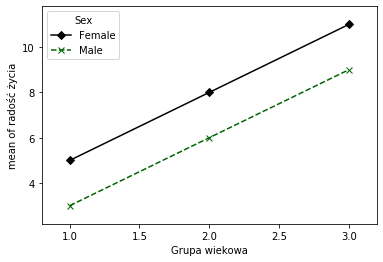

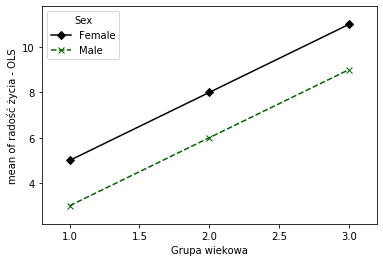

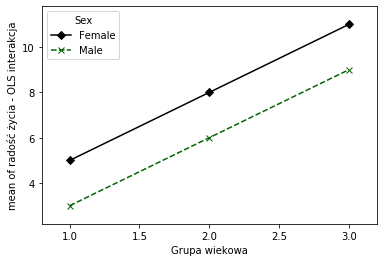

In [63]:
from statsmodels.graphics.factorplots import interaction_plot


fig = interaction_plot(df_melt['Age'], df_melt['Sex'],df_melt['value'],
             colors=['black','darkgreen'], markers=['D','x'], linestyles=["-", "--"], ylabel='radość życia', xlabel='Grupa wiekowa')
fig = interaction_plot(df_melt['Age'],df_melt['Sex'], Fit1.fittedvalues,
            colors=['black','darkgreen'], markers=['D','x'],linestyles=["-", "--"], ylabel='radość życia - OLS', xlabel='Grupa wiekowa')
fig = interaction_plot(df_melt['Age'],df_melt['Sex'], Fit2.fittedvalues,
             colors=['black','darkgreen'], markers=['D','x'], linestyles=["-", "--"], ylabel='radość życia - OLS interakcja', xlabel='Grupa wiekowa')

import matplotlib.pyplot as plt
plt.show()

### Interpretacja wykresu interakcji

Wykres interakcji pokazuje w jaki sposób związek między jednym czynnikiem kategorycznym (płeć) a ciągłą reakcją zależy od wartości drugiego czynnika kategorycznego (grupa wiekowa). Ten wykres wyświetla średnie dla poziomów jednego czynnika na osi y oraz osobną linię dla każdego czynnika.

- Równoległe linie oznaczają brak interakcji.
- Linie nierównoległe - występuje interakcja. 

Im bardziej nierównoległe są linie, tym większa jest siła interakcji.
Chociaż można użyć tego wykresu do wyświetlenia efektów, należy wykonać odpowiedni test ANOVA i ocenić istotność statystyczną efektów. Jeśli efekty interakcji są znaczące, nie można interpretować głównych efektów bez uwzględnienia efektów interakcji.